In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive

## Material Balance

### i) Gas material balance

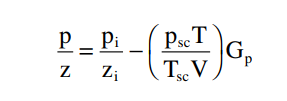

In [2]:
T = [0, 0.5, 1, 1.5, 2]
rp = [1798, 1680, 1540, 1428, 1335]
Z = [0.869, 0.87, 0.88, 0.89, 0.9]
Gp = [0, 0.96, 2.12, 3.21, 3.92]

In [9]:
df = pd.DataFrame({"Time(years)": T, "Reservoir Pressure(psia)":rp, "Z factor":Z, "Cummulative Gas Production(MMSCF)":Gp})

In [10]:
df

,Time(years),Reservoir Pressure(psia),Z factor,Cummulative Gas Production(MMSCF)
0,0.0,1798,0.869,0.00
1,0.5,1680,0.870,0.96
2,1.0,1540,0.880,2.12
3,1.5,1428,0.890,3.21
4,2.0,1335,0.900,3.92


In [11]:
df["P/Z"] = df["Reservoir Pressure(psia)"]/df["Z factor"]

In [12]:
df

,Time(years),Reservoir Pressure(psia),Z factor,Cummulative Gas Production(MMSCF),P/Z
0,0.0,1798,0.869,0.00,2069.044879
1,0.5,1680,0.870,0.96,1931.034483
2,1.0,1540,0.880,2.12,1750.000000
3,1.5,1428,0.890,3.21,1604.494382
4,2.0,1335,0.900,3.92,1483.333333


In [13]:
x = df["Cummulative Gas Production(MMSCF)"]
y = df["P/Z"]

Text(0, 0.5, 'P/Z')

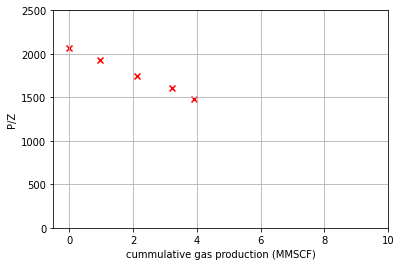

In [16]:
plt.scatter(x, y, marker = "x", color = "red")
plt.xlim(-0.5, 10)
plt.ylim(0, 2500)
plt.grid()
plt.xlabel("cummulative gas production (MMSCF)")
plt.ylabel("P/Z")

In [17]:
model = np.polyfit(x, y, 1)

In [18]:
model

array([-148.2874553 , 2070.38439919])

In [20]:
PZ = np.arange(model[1], 0, -1)

In [21]:
GPP = (PZ - model[1])/model[0]

In [23]:
DF = pd.DataFrame({"Cumulative Gas Production(MMSCF)":GPP, "P/Z":PZ})

In [24]:
DF

,Cumulative Gas Production(MMSCF),P/Z
0,-0.000000,2070.384399
1,0.006744,2069.384399
2,0.013487,2068.384399
3,0.020231,2067.384399
4,0.026975,2066.384399
...,...,...
2066,13.932399,4.384399
2067,13.939143,3.384399
2068,13.945886,2.384399
2069,13.952630,1.384399


In [26]:
initial_gas_in_place = (-model[1])/(model[0])
initial_gas_in_place

13.96196593265716

The gas initially in place is 13.96196593265716 MMSCF


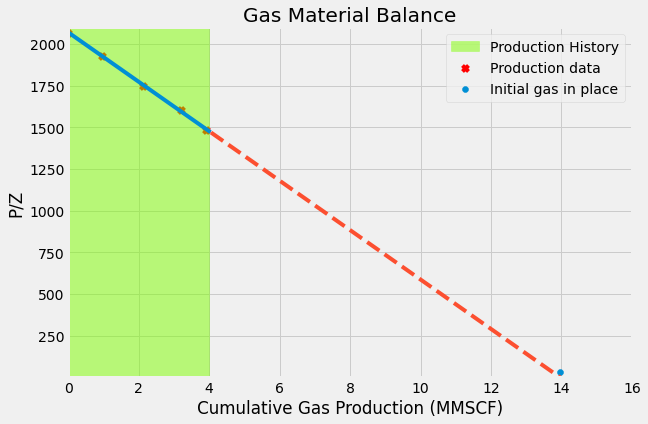

In [30]:
plt.figure(figsize=(9, 6))
plt.plot(DF["Cumulative Gas Production(MMSCF)"][1:600], DF["P/Z"][1:600])
plt.plot(DF["Cumulative Gas Production(MMSCF)"][601:2072], DF["P/Z"][601:2072], ls = "--")
plt.scatter(x, y, marker = 'x', color = 'red', label = "Production data")
plt.scatter(initial_gas_in_place, 30, label = "Initial gas in place")
plt.style.use("fivethirtyeight")
plt.xlim(0, 16)
plt.ylim(1, 2100)
plt.axvspan(0, 4, alpha = 0.5, label = "Production History", color = "chartreuse")
plt.xlabel("Cumulative Gas Production (MMSCF)")
plt.ylabel("P/Z")
plt.title("Gas Material Balance")
plt.legend()
plt.grid(True)
print(f"The gas initially in place is {initial_gas_in_place} MMSCF")

### Oil Material Balance for undersaturated reservoir

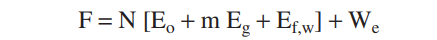

In [32]:
swi = float(input("Enter the intital water saturation (fraction): "))
cw = float(input("Enter the compressiblity of water (psi^-1): "))
cf = float(input("Enter the compressiblity  of formation (psi^-1): "))
pb = float(input("Enter the bubble point pressure(psi): "))

Enter the intital water saturation (fraction): 0.24
Enter the compressiblity of water (psi^-1): .0000032
Enter the compressiblity  of formation (psi^-1): 0.00004958
Enter the bubble point pressure(psi): 1500


In [33]:
Rp = [3685, 3680,3676,3667,3664,3640,3605,3567,3515,3448,3360,3275,3188]
No_of_producing_wells = [1,2,2,3,4,19,25,36,48,59,59,61,61]
Bo = [1.3102,1.3104,1.3104,1.3105,1.3105,1.3109,1.3116,1.3122,1.3128,1.3130,1.3150,1.3160,1.3170]
Np = [0,20.481,34.750,78.557,101.846,215.681,364.613, 542.985,841.591,1273.530 ,1691.887,2127.077,2575.330 ]
Wp = [0,0,0,0,0,0,0,0.159,0.805,2.579,5.008,6.5,8]

In [34]:
df = pd.DataFrame({"Reservoir Pressure":Rp,"No_of_producing_wells":No_of_producing_wells, "Bo(rb/stb)": Bo, "Cumulative oil Produced Np(Mstb)": Np,"Cumulative water Produced Wp(Mstb)": Wp })

In [35]:
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb)
0,3685,1,1.3102,0.000,0.000
1,3680,2,1.3104,20.481,0.000
2,3676,2,1.3104,34.750,0.000
3,3667,3,1.3105,78.557,0.000
4,3664,4,1.3105,101.846,0.000
5,3640,19,1.3109,215.681,0.000
6,3605,25,1.3116,364.613,0.000
7,3567,36,1.3122,542.985,0.159
8,3515,48,1.3128,841.591,0.805
9,3448,59,1.3130,1273.530,2.579


In [55]:
#the expansion of the initial water and the reduction in the pore volume
df["Efw"] = df["Bo(rb/stb)"] * ((((cw*swi)+ cf)*(3685-df["Reservoir Pressure"]))/(1-swi))

In [56]:
df["Eo"] = df["Bo(rb/stb)"]-1.3102

In [57]:
df["F(Mbbl)"] = (df["Cumulative oil Produced Np(Mstb)"]*df["Bo(rb/stb)"]) + (df["Cumulative water Produced Wp(Mstb)"])


In [58]:
df["Eo+Efw"] = df["Efw"] + df["Eo"]

In [59]:
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb),Efw,Eo,Eo+Efw,F(Mbbl)
0,3685,1,1.3102,0.000,0.000,0.000000,0.0000,0.000000,0.000000
1,3680,2,1.3104,20.481,0.000,0.000434,0.0002,0.000634,26.838302
2,3676,2,1.3104,34.750,0.000,0.000781,0.0002,0.000981,45.536400
3,3667,3,1.3105,78.557,0.000,0.001563,0.0003,0.001863,102.948949
4,3664,4,1.3105,101.846,0.000,0.001823,0.0003,0.002123,133.469183
5,3640,19,1.3109,215.681,0.000,0.003908,0.0007,0.004608,282.736223
6,3605,25,1.3116,364.613,0.000,0.006951,0.0014,0.008351,478.226411
7,3567,36,1.3122,542.985,0.159,0.010258,0.0020,0.012258,712.663917
8,3515,48,1.3128,841.591,0.805,0.014785,0.0026,0.017385,1105.645665
9,3448,59,1.3130,1273.530,2.579,0.020615,0.0028,0.023415,1674.723890


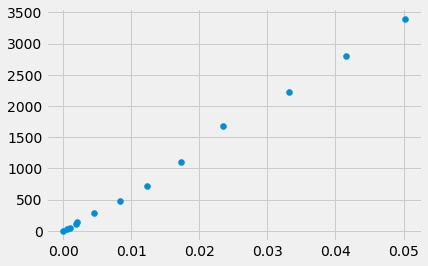

In [63]:
x = df["Eo+Efw"]
y = df["F(Mbbl)"]
plt.scatter(x, y)

In [64]:
model =  np.polyfit(x, y, 1)
model

array([ 6.84249437e+04, -3.40855576e+01])

In [65]:
df["F(Mbbl)fit"] = 68429.437*df["Eo+Efw"] - 34.08556

In [66]:
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb),Efw,Eo,Eo+Efw,F(Mbbl),F(Mbbl)fit
0,3685,1,1.3102,0.000,0.000,0.000000,0.0000,0.000000,0.000000,-34.085560
1,3680,2,1.3104,20.481,0.000,0.000434,0.0002,0.000634,26.838302,9.302313
2,3676,2,1.3104,34.750,0.000,0.000781,0.0002,0.000981,45.536400,33.063902
3,3667,3,1.3105,78.557,0.000,0.001563,0.0003,0.001863,102.948949,93.378580
4,3664,4,1.3105,101.846,0.000,0.001823,0.0003,0.002123,133.469183,111.201132
5,3640,19,1.3109,215.681,0.000,0.003908,0.0007,0.004608,282.736223,281.234917
6,3605,25,1.3116,364.613,0.000,0.006951,0.0014,0.008351,478.226411,537.382619
7,3567,36,1.3122,542.985,0.159,0.010258,0.0020,0.012258,712.663917,804.703047
8,3515,48,1.3128,841.591,0.805,0.014785,0.0026,0.017385,1105.645665,1155.548069
9,3448,59,1.3130,1273.530,2.579,0.020615,0.0028,0.023415,1674.723890,1568.184394


The oil intially in place is, 68424.94367352994 STB given by slope of the line


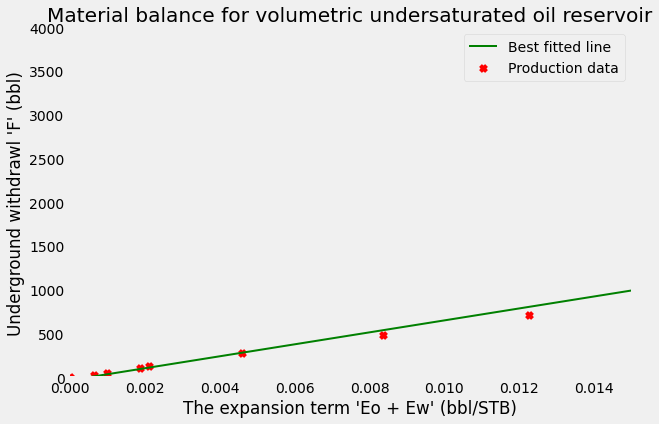

In [68]:
plt.figure(figsize = (9, 6))
plt.scatter(x, y, marker = 'x', color = 'red', label = "Production data")
plt.plot(x, df["F(Mbbl)fit"], label = "Best fitted line", color = "green", lw = 2)

plt.xlim(-0.00005, 0.015)
plt.ylim(-0.5, 4000)
plt.xlabel("The expansion term 'Eo + Ew' (bbl/STB)")
plt.ylabel("Underground withdrawl 'F' (bbl)")
plt.title("Material balance for volumetric undersaturated oil reservoir")
plt.grid()
plt.legend()
print(f"The oil intially in place is, {model[0]} STB given by slope of the line")
plt.show()

### Gascap MBAL

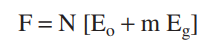

In [133]:
RP = [3330,3150,3000,2850,2700,2550,2400]
Np = [0,3.295,5.903,8.852,11.503,14.513,17.730]
Rp = [0,1050,1060,1160,1235,1265,1300]
Bo = [1.2511,1.2353,1.2222,1.2122,1.2022,1.1922,1.1822]
Rs = [510,477,450,425,401,375,352]
Bg = [0.00087,0.00092,0.00096,0.00101,0.00107,0.00113,0.00120]

In [134]:
df = pd.DataFrame({"Reservoir Pressure(psia)": RP, "Np(MMstb)": Np, "Rp(scf/stb)":Rp, "Bo(rb/stb)":Bo, "Rs(scf/stb)":Rs, "Bg(rb/scf)":Bg})

In [135]:
df

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf)
0,3330,0.000,0,1.2511,510,0.00087
1,3150,3.295,1050,1.2353,477,0.00092
2,3000,5.903,1060,1.2222,450,0.00096
3,2850,8.852,1160,1.2122,425,0.00101
4,2700,11.503,1235,1.2022,401,0.00107
5,2550,14.513,1265,1.1922,375,0.00113
6,2400,17.730,1300,1.1822,352,0.00120


In [146]:
# total underground withdrawl F term
df["F(MM rb)"] = df["Np(MMstb)"]*(df["Bo(rb/stb)"] + (df["Rp(scf/stb)"]-df["Rs(scf/stb)"])*df["Bg(rb/scf)"]) 

In [147]:
# The Eo term expansion of oil & dissolved gas
df["Eo(rb/stb)"] = (df["Bo(rb/stb)"]-1.2511) + (510 - df["Rs(scf/stb)"])*df["Bg(rb/scf)"]

In [148]:
# The Eg term expansion of gas cap 
df["Eg(rb/stb)"] = 1.2511*((df["Bg(rb/scf)"]/0.00087)-1)

In [149]:
M = [0.3, 0.4, 0.5, 0.6, 0.7]

In [150]:
df

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf),F(MM rb),Eo(rb/stb),Eg(rb/stb)
0,3330,0.000,0,1.2511,510,0.00087,0.000000,0.00000,0.000000
1,3150,3.295,1050,1.2353,477,0.00092,5.807306,0.01456,0.071902
2,3000,5.903,1060,1.2222,450,0.00096,10.671443,0.02870,0.129424
3,2850,8.852,1160,1.2122,425,0.00101,17.301677,0.04695,0.201326
4,2700,11.503,1235,1.2022,401,0.00107,24.093954,0.06773,0.287609
5,2550,14.513,1265,1.1922,375,0.00113,31.898123,0.09365,0.373892
6,2400,17.730,1300,1.1822,352,0.00120,41.130054,0.12070,0.474555


In [151]:
for i in M:
    df[f"Eo+M{i}Eg"] = df["Eo(rb/stb)"] + i*df["Eg(rb/stb)"]

In [152]:
df

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf),F(MM rb),Eo(rb/stb),Eg(rb/stb),Eo+M0.3Eg,Eo+M0.4Eg,Eo+M0.5Eg,Eo+M0.6Eg,Eo+M0.7Eg
0,3330,0.000,0,1.2511,510,0.00087,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3150,3.295,1050,1.2353,477,0.00092,5.807306,0.01456,0.071902,0.036131,0.043321,0.050511,0.057701,0.064892
2,3000,5.903,1060,1.2222,450,0.00096,10.671443,0.02870,0.129424,0.067527,0.080470,0.093412,0.106354,0.119297
3,2850,8.852,1160,1.2122,425,0.00101,17.301677,0.04695,0.201326,0.107348,0.127481,0.147613,0.167746,0.187879
4,2700,11.503,1235,1.2022,401,0.00107,24.093954,0.06773,0.287609,0.154013,0.182774,0.211535,0.240296,0.269056
5,2550,14.513,1265,1.1922,375,0.00113,31.898123,0.09365,0.373892,0.205818,0.243207,0.280596,0.317985,0.355374
6,2400,17.730,1300,1.1822,352,0.00120,41.130054,0.12070,0.474555,0.263067,0.310522,0.357978,0.405433,0.452889


The oil initially in place is 155.43003852376873 MMSTB for m = 0.3
The oil initially in place is 131.77712071961056 MMSTB for m = 0.4
The oil initially in place is 114.37046619758794 MMSTB for m = 0.5
The oil initially in place is 101.02489219651801 MMSTB for m = 0.6
The oil initially in place is 90.46788437559394 MMSTB for m = 0.7


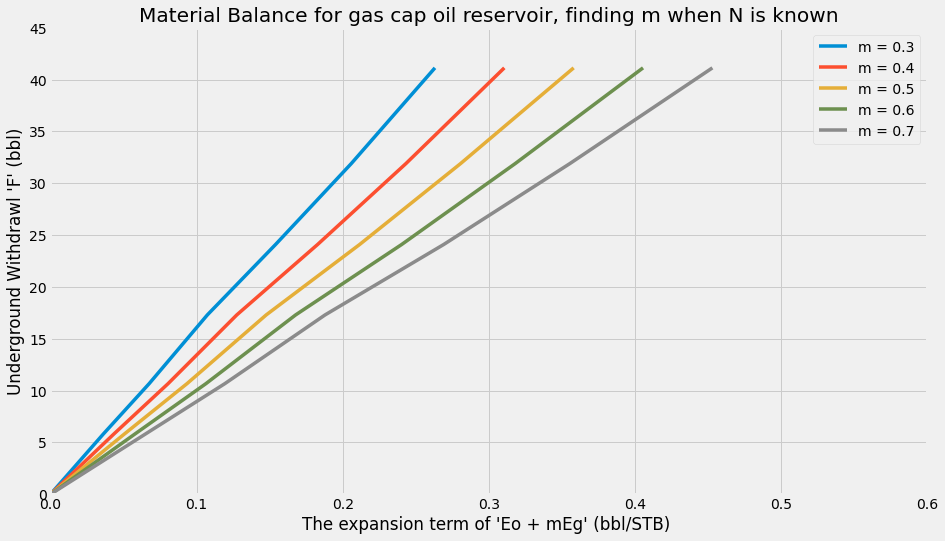

In [153]:
plt.figure(figsize = (14, 8))
plt.style.use("fivethirtyeight")
plt.xlim(0, 0.6)
plt.ylim(0, 45)
plt.xlabel("The expansion term of 'Eo + mEg' (bbl/STB) ")
plt.ylabel("Underground Withdrawl 'F' (bbl)")
plt.title("Material Balance for gas cap oil reservoir, finding m when N is known")

for i in M:
    plt.plot(df[f"Eo+M{i}Eg"], df["F(MM rb)"], label = f"m = {i}", lw = 3.5)
    plt.legend()
    x = df[f"Eo+M{i}Eg"]
    y = df["F(MM rb)"]
    model = np.polyfit(x, y, 1)
    print(f"The oil initially in place is {model[0]} MMSTB for m = {i}")

In [167]:
def gascap(m):
    
    RP = [3330,3150,3000,2850,2700,2550,2400]
    Np = [0,3.295,5.903,8.852,11.503,14.513,17.730]
    Rp = [0,1050,1060,1160,1235,1265,1300]
    Bo = [1.2511,1.2353,1.2222,1.2122,1.2022,1.1922,1.1822]
    Rs = [510,477,450,425,401,375,352]
    Bg = [0.00087,0.00092,0.00096,0.00101,0.00107,0.00113,0.00120]
    df = pd.DataFrame({"Reservoir Pressure(psia)": RP, "Np(MMstb)": Np, "Rp(scf/stb)":Rp, "Bo(rb/stb)":Bo, "Rs(scf/stb)":Rs, "Bg(rb/scf)":Bg})
    df["F(MM rb)"] = df["Np(MMstb)"]*(df["Bo(rb/stb)"] + (df["Rp(scf/stb)"]-df["Rs(scf/stb)"])*df["Bg(rb/scf)"])
    df["Eo(rb/stb)"] = (df["Bo(rb/stb)"]-1.2511) + (510 - df["Rs(scf/stb)"])*df["Bg(rb/scf)"]
    df["Eg(rb/stb)"] = 1.2511*((df["Bg(rb/scf)"]/0.00087)-1)
    df["Eo+mEg(rb/stb)"] = df["Eo(rb/stb)"] + m*df["Eg(rb/stb)"]
    x = df["Eo+mEg(rb/stb)"]
    y = df["F(MM rb)"]
    model = np.polyfit(x, y, 1)
    print(f"The OIP is {model[0]} MMSTB by slope of given line")
    
    adf = df[["Reservoir Pressure(psia)", "F(MM rb)", "Eo+mEg(rb/stb)"]]
    print(adf)
    
    plt.figure(figsize = (10, 6))
    plt.style.use("fivethirtyeight")
    plt.plot(df["Eo+mEg(rb/stb)"], df["F(MM rb)"], color = 'red')
    
    plt.xlim(-0.05, 0.6)
    plt.ylim(-0.05, 45)
    
    plt.xlabel("The Expansion Term 'Eo + mEg' (bbl/STB)")
    plt.ylabel("Underground Withdrawl 'F'(bbl)")
    plt.title("Material Balance for Gas Cap Oil Reservoir")
    
    return df["Eo+mEg(rb/stb)"],df["F(MM rb)"]

In [168]:
w = interactive(gascap, m = (0.000001, 1, 0.1))

In [169]:
w

interactive(children=(FloatSlider(value=0.400001, description='m', max=1.0, min=1e-06), Output()), _dom_classe…

### When N is unknown 

In [170]:
df["F/Eo(stb)"] = df["F(MM rb)"]/df["Eo(rb/stb)"]
df["Eg/Eo"] = df["Eg(rb/stb)"]/df["Eo(rb/stb)"]
gdf = df[["Reservoir Pressure(psia)", "F/Eo(stb)", "Eg/Eo"]]
gdf

,Reservoir Pressure(psia),F/Eo(stb),Eg/Eo
0,3330,NaN,NaN
1,3150,398.853413,4.938345
2,3000,371.827296,4.509552
3,2850,368.512814,4.288103
4,2700,355.735328,4.246408
5,2550,340.609959,3.992439
6,2400,340.762668,3.931692


In [171]:
xx = gdf["Eg/Eo"][1:7]
yy = gdf["F/Eo(stb)"][1:7]
model = np.polyfit(xx, yy, 1)
model

array([ 58.83013376, 108.70272737])

In [172]:
xxfit = list(xx)
xxfit.append(0)
xxfit

[4.938344701275751,
 4.509551844286939,
 4.288103019842596,
 4.246407727776458,
 3.992439444986536,
 3.9316915692940655,
 0]

In [173]:
yyfit = []
for i in xxfit:
    a = model[0]*i + model[1]
    yyfit.append(a)
yyfit

[399.22620669354853,
 374.0002655622319,
 360.9724015995213,
 358.5194619901731,
 343.57847394324,
 340.0046682907107,
 108.70272737219946]

The eqn of line is: F/Eo = mN(Eg/Eo) + N
The value of initial OIP is 108.70272737219946 MMSTB by given intercept of the line
The value of initial ratio in reservoir(m) is 0.5412020027520338 given by slope(m*N) intercept(N) of line


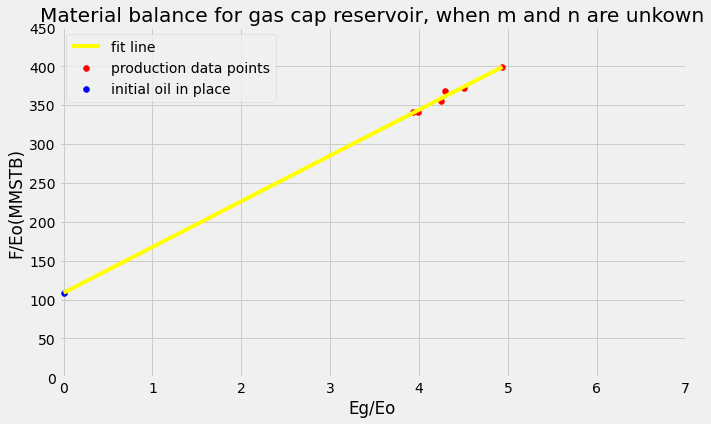

In [178]:
plt.figure(figsize = (10, 6))
plt.plot(xxfit, yyfit, label = "fit line", color = 'yellow')
plt.scatter(gdf["Eg/Eo"], gdf["F/Eo(stb)"], c = "red", label = "production data points")
plt.scatter(0, model[1], c = "blue", label = "initial oil in place")
plt.xlabel("Eg/Eo")
plt.ylabel("F/Eo(MMSTB)")
plt.title("Material balance for gas cap reservoir, when m and n are unkown")
plt.legend()
plt.xlim(-0.05, 7)
plt.ylim(0, 450)
print("The eqn of line is: F/Eo = mN(Eg/Eo) + N")
print(f"The value of initial OIP is {model[1]} MMSTB by given intercept of the line")
print(f"The value of initial ratio in reservoir(m) is {model[0]/model[1]} given by slope(m*N) intercept(N) of line")